###Install NLTK

In [415]:
pip install nltk

###Install Library Sastrawi

In [416]:
pip install Sastrawi

In [417]:
!pip install nltk scikit-learn matplotlib seaborn
!pip install wordcloud matplotlib

#Import Library

In [418]:
import numpy as np
import re
import pandas as pd
import nltk
import Sastrawi
import string

###Upload Files Dataset Hasil Crawling

In [419]:
from google.colab import files
uploades = files.upload()

df = pd.read_excel("polusi_udara.xlsx")

Saving polusi_udara.xlsx to polusi_udara.xlsx


In [425]:
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Oct 31 23:05:53 +0000 2023,1719490906880090112,@ohmybeautybank tidak henti hentinya bilang pa...,0,0,0,0,in,1398206848927290112,1719262167286060032,yo0ngimania,https://twitter.com/yo0ngimania/status/1719490...
1,Tue Oct 31 17:50:54 +0000 2023,1719411639613829888,Para Antek Corporation dari politikus sampai j...,0,0,1,2,in,1226838802162800128,1719411639613829888,ibnuchunke,https://twitter.com/ibnuchunke/status/17194116...
2,Tue Oct 31 16:52:41 +0000 2023,1719396988326929920,Langit Jakarta kelabu Aku kira polusi udara. T...,0,0,0,1,in,1170231355805850112,1719396988326929920,Asrorudn,https://twitter.com/Asrorudn/status/1719396988...
3,Tue Oct 31 16:34:00 +0000 2023,1719392287984329984,Israel iki nafas ae wes nyerimpeti dunyo ngent...,0,2,0,0,in,1440878684320110080,1719392287984329984,byunnbacon__,https://twitter.com/byunnbacon__/status/171939...
4,Tue Oct 31 14:31:08 +0000 2023,1719361368091150080,@pupuk_indonesia Semoga dengan program ini pol...,0,1,0,0,in,719534833332977024,1719301263622579968,denistwitt3r,https://twitter.com/denistwitt3r/status/171936...


In [426]:
total_rows = df.shape[0]
print(f'{total_rows}')

3154


In [427]:
df.dtypes

created_at             object
id_str                  int64
full_text              object
quote_count             int64
reply_count             int64
retweet_count           int64
favorite_count          int64
lang                   object
user_id_str             int64
conversation_id_str     int64
username               object
tweet_url              object
dtype: object

In [428]:
print(df.columns)

Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')


#Cleansing Dataset

###Menghapus Duplicate

In [429]:
df.drop_duplicates(subset='full_text', keep='first', inplace=True)

In [377]:
total_rows = df.shape[0]
print(f'{total_rows}')

3154


In [430]:
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Tue Oct 31 23:05:53 +0000 2023,1719490906880090112,@ohmybeautybank tidak henti hentinya bilang pa...,0,0,0,0,in,1398206848927290112,1719262167286060032,yo0ngimania,https://twitter.com/yo0ngimania/status/1719490...
1,Tue Oct 31 17:50:54 +0000 2023,1719411639613829888,Para Antek Corporation dari politikus sampai j...,0,0,1,2,in,1226838802162800128,1719411639613829888,ibnuchunke,https://twitter.com/ibnuchunke/status/17194116...
2,Tue Oct 31 16:52:41 +0000 2023,1719396988326929920,Langit Jakarta kelabu Aku kira polusi udara. T...,0,0,0,1,in,1170231355805850112,1719396988326929920,Asrorudn,https://twitter.com/Asrorudn/status/1719396988...
3,Tue Oct 31 16:34:00 +0000 2023,1719392287984329984,Israel iki nafas ae wes nyerimpeti dunyo ngent...,0,2,0,0,in,1440878684320110080,1719392287984329984,byunnbacon__,https://twitter.com/byunnbacon__/status/171939...
4,Tue Oct 31 14:31:08 +0000 2023,1719361368091150080,@pupuk_indonesia Semoga dengan program ini pol...,0,1,0,0,in,719534833332977024,1719301263622579968,denistwitt3r,https://twitter.com/denistwitt3r/status/171936...


###Menghapus Kolom dengan label yang tidak diperlukan

In [431]:
df = df.drop('created_at', axis=1)
df = df.drop('id_str', axis=1)
df = df.drop('quote_count', axis=1)
df = df.drop('reply_count', axis=1)
df = df.drop('retweet_count', axis=1)
df = df.drop('favorite_count', axis=1)
df = df.drop('lang', axis=1)
df = df.drop('user_id_str', axis=1)
df = df.drop('conversation_id_str', axis=1)
df = df.drop('username', axis=1)
df = df.drop('tweet_url', axis=1)

In [432]:
df.head()

,full_text
0,@ohmybeautybank tidak henti hentinya bilang pa...
1,Para Antek Corporation dari politikus sampai j...
2,Langit Jakarta kelabu Aku kira polusi udara. T...
3,Israel iki nafas ae wes nyerimpeti dunyo ngent...
4,@pupuk_indonesia Semoga dengan program ini pol...


###Menghilangkan Mentions pada Full Text

In [433]:
def cleanmentions(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  text = re.sub(r"(?:\@|https?\://|www)\S+","",text)
  text = re.sub(r'_','',text)

  return text

In [434]:
df['full_text'] = df['full_text'].astype(str)
df['full_text'].fillna('',inplace=True)

In [435]:
df['full_text'] = df['full_text'].apply(cleanmentions)
df.head()

,full_text
0,tidak henti hentinya bilang pake xixiu (real ...
1,Para Antek Corporation dari politikus sampai j...
2,Langit Jakarta kelabu Aku kira polusi udara. T...
3,Israel iki nafas ae wes nyerimpeti dunyo ngent...
4,indonesia Semoga dengan program ini polusi uda...


###Menghilangkan Punctuation

In [436]:
df['full_text'] = df['full_text'].str.replace('[^\w\s]','', regex=True)
df.head()

,full_text
0,tidak henti hentinya bilang pake xixiu real m...
1,Para Antek Corporation dari politikus sampai j...
2,Langit Jakarta kelabu Aku kira polusi udara Te...
3,Israel iki nafas ae wes nyerimpeti dunyo ngent...
4,indonesia Semoga dengan program ini polusi uda...


###Menghilangkan Angka pada Full Text

In [437]:
df['full_text'] = df['full_text'].str.replace('[0-9]+','',regex=True)
df.head()

,full_text
0,tidak henti hentinya bilang pake xixiu real m...
1,Para Antek Corporation dari politikus sampai j...
2,Langit Jakarta kelabu Aku kira polusi udara Te...
3,Israel iki nafas ae wes nyerimpeti dunyo ngent...
4,indonesia Semoga dengan program ini polusi uda...


#Case Folding

In [438]:
df['full_text'] = df['full_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,full_text
0,tidak henti hentinya bilang pake xixiu real me...
1,para antek corporation dari politikus sampai j...
2,langit jakarta kelabu aku kira polusi udara te...
3,israel iki nafas ae wes nyerimpeti dunyo ngent...
4,indonesia semoga dengan program ini polusi uda...


In [439]:
df.to_csv('hasil_Cleansing.csv', index=False)
files.download('hasil_Cleansing.csv')
df.head(30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,full_text
0,tidak henti hentinya bilang pake xixiu real me...
1,para antek corporation dari politikus sampai j...
2,langit jakarta kelabu aku kira polusi udara te...
3,israel iki nafas ae wes nyerimpeti dunyo ngent...
4,indonesia semoga dengan program ini polusi uda...
5,pakistan ada masalah polusi udara jugaâ
6,kualitas udara jakarta masih buruk meskipun pe...
7,pak kalau blh usul semua kota besar amp kecil ...
8,bbm adlh hasil tambang tpi punya dampak polusi...
9,wow besok aku menghirup polusi udara yang sama...


#Download library untuk Tokenize, Stopwords, Stemming

In [440]:
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

###Tahap Tokenizing

In [441]:
def tokenize_text(text):
  tokens = nltk.tokenize.word_tokenize(text)
  return tokens

In [442]:
df['token'] =df ['full_text'].apply(tokenize_text)
df.head()

,full_text,token
0,tidak henti hentinya bilang pake xixiu real me...,"[tidak, henti, hentinya, bilang, pake, xixiu, ..."
1,para antek corporation dari politikus sampai j...,"[para, antek, corporation, dari, politikus, sa..."
2,langit jakarta kelabu aku kira polusi udara te...,"[langit, jakarta, kelabu, aku, kira, polusi, u..."
3,israel iki nafas ae wes nyerimpeti dunyo ngent...,"[israel, iki, nafas, ae, wes, nyerimpeti, duny..."
4,indonesia semoga dengan program ini polusi uda...,"[indonesia, semoga, dengan, program, ini, polu..."


###Tahap Stopword Removal

In [443]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print (stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [444]:
def stopword_text(tokens):
  cleaned_tokens = []
  for token in tokens:
    if token not in stopwords:
      cleaned_tokens.append(token)
  return cleaned_tokens

In [445]:
df['stop'] = df['token'].apply(stopword_text)
df.head()

,full_text,token,stop
0,tidak henti hentinya bilang pake xixiu real me...,"[tidak, henti, hentinya, bilang, pake, xixiu, ...","[henti, hentinya, bilang, pake, xixiu, real, m..."
1,para antek corporation dari politikus sampai j...,"[para, antek, corporation, dari, politikus, sa...","[antek, corporation, politikus, jajaran, mente..."
2,langit jakarta kelabu aku kira polusi udara te...,"[langit, jakarta, kelabu, aku, kira, polusi, u...","[langit, jakarta, kelabu, aku, kira, polusi, u..."
3,israel iki nafas ae wes nyerimpeti dunyo ngent...,"[israel, iki, nafas, ae, wes, nyerimpeti, duny...","[israel, iki, nafas, ae, wes, nyerimpeti, duny..."
4,indonesia semoga dengan program ini polusi uda...,"[indonesia, semoga, dengan, program, ini, polu...","[indonesia, semoga, program, polusi, udara, te..."


In [446]:
df = df.drop('stop', axis=1)

###Tahap Stemming

In [447]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

In [448]:
def stemming_text(tokens):
  hasil = [stemmer.stem(token) for token in tokens]
  return hasil

###Menyimpan Hasil Preprocessing

In [449]:
df.to_csv('hasil_preprocessingIndo.csv', index=False)
files.download('hasil_preprocessingIndo.csv')
df.head(30)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,full_text,token
0,tidak henti hentinya bilang pake xixiu real me...,"[tidak, henti, hentinya, bilang, pake, xixiu, ..."
1,para antek corporation dari politikus sampai j...,"[para, antek, corporation, dari, politikus, sa..."
2,langit jakarta kelabu aku kira polusi udara te...,"[langit, jakarta, kelabu, aku, kira, polusi, u..."
3,israel iki nafas ae wes nyerimpeti dunyo ngent...,"[israel, iki, nafas, ae, wes, nyerimpeti, duny..."
4,indonesia semoga dengan program ini polusi uda...,"[indonesia, semoga, dengan, program, ini, polu..."
5,pakistan ada masalah polusi udara jugaâ,"[pakistan, ada, masalah, polusi, udara, jugaâ]"
6,kualitas udara jakarta masih buruk meskipun pe...,"[kualitas, udara, jakarta, masih, buruk, meski..."
7,pak kalau blh usul semua kota besar amp kecil ...,"[pak, kalau, blh, usul, semua, kota, besar, am..."
8,bbm adlh hasil tambang tpi punya dampak polusi...,"[bbm, adlh, hasil, tambang, tpi, punya, dampak..."
9,wow besok aku menghirup polusi udara yang sama...,"[wow, besok, aku, menghirup, polusi, udara, ya..."


In [450]:
from nltk.probability import FreqDist

In [451]:
import matplotlib.pyplot as plt

# Pembobotan Kata Hasil Tokenize dengan TF-IDF

In [452]:
df.to_csv("/content/hasil_preprocessingIndo.csv", index = False)
data = pd.read_csv("/content/hasil_preprocessingIndo.csv")
data.head()

,full_text,token
0,tidak henti hentinya bilang pake xixiu real me...,"['tidak', 'henti', 'hentinya', 'bilang', 'pake..."
1,para antek corporation dari politikus sampai j...,"['para', 'antek', 'corporation', 'dari', 'poli..."
2,langit jakarta kelabu aku kira polusi udara te...,"['langit', 'jakarta', 'kelabu', 'aku', 'kira',..."
3,israel iki nafas ae wes nyerimpeti dunyo ngent...,"['israel', 'iki', 'nafas', 'ae', 'wes', 'nyeri..."
4,indonesia semoga dengan program ini polusi uda...,"['indonesia', 'semoga', 'dengan', 'program', '..."


###Pembobotan kata dengan TF-IDF menjadi kamus Lexicon Indonesia

In [453]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming you have a DataFrame df with a column 'text' containing tokenized words

# Tokenize the text
df['full_text'] = df['full_text'].apply(lambda x: x.lower().split())

# Convert the tokenized words back to text
df['full_text'] = df['full_text'].apply(lambda x: ' '.join(x))

# Create a TF-IDF vectorizer with minimum document frequency (min_df) and maximum document frequency (max_df) thresholds
tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.8)  # Adjust these thresholds based on your dataset

# Fit and transform the text data to obtain TF-IDF features
tfidf_matrix = tfidf_vectorizer.fit_transform(df['full_text'])

# Create a DataFrame with TF-IDF features and corresponding words
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Calculate the average TF-IDF score for each word across all documents
word_weights = tfidf_df.mean(axis=0)

# Create a lexicon dictionary with words as keys and weights as values
lexicon_dict = word_weights.to_dict()

# Display the lexicon dictionary
lexicon_dict

# Convert the dictionary to a DataFrame
lexicon_df = pd.DataFrame(list(lexicon_dict.items()), columns=['word', 'weight'])

# Save the DataFrame to a CSV file
lexicon_df.to_csv('/content/indo_lexicon_dict.csv', index=False)

#Pemberian Sentiment dengan menggunakan kamus Lexicon Indonesia

In [454]:
df.to_csv("/content/hasil_preprocessingIndo.csv", index = False)
data = pd.read_csv("/content/hasil_preprocessingIndo.csv")
data.head(3000)

,full_text,token
0,tidak henti hentinya bilang pake xixiu real me...,"['tidak', 'henti', 'hentinya', 'bilang', 'pake..."
1,para antek corporation dari politikus sampai j...,"['para', 'antek', 'corporation', 'dari', 'poli..."
2,langit jakarta kelabu aku kira polusi udara te...,"['langit', 'jakarta', 'kelabu', 'aku', 'kira',..."
3,israel iki nafas ae wes nyerimpeti dunyo ngent...,"['israel', 'iki', 'nafas', 'ae', 'wes', 'nyeri..."
4,indonesia semoga dengan program ini polusi uda...,"['indonesia', 'semoga', 'dengan', 'program', '..."
...,...,...
2995,dengan membangun area hijau kita dapat meningk...,"['dengan', 'membangun', 'area', 'hijau', 'kita..."
2996,waww polusi udara,"['waww', 'polusi', 'udara']"
2997,biasanya menghirup udara polusi,"['biasanya', 'menghirup', 'udara', 'polusi']"
2998,biar dia diliatin orangorang hahay mampus kao ...,"['biar', 'dia', 'diliatin', 'orangorang', 'hah..."


In [455]:
df.drop(columns=['token'], inplace=True)

df.head()

,full_text
0,tidak henti hentinya bilang pake xixiu real me...
1,para antek corporation dari politikus sampai j...
2,langit jakarta kelabu aku kira polusi udara te...
3,israel iki nafas ae wes nyerimpeti dunyo ngent...
4,indonesia semoga dengan program ini polusi uda...


In [456]:
import pandas as pd

# Assuming you have loaded your lexicon into lexicon_df and created lexicon_dict
lexicon_file_path = '/content/indo_lexicon_dict (1).csv'
lexicon_df = pd.read_csv(lexicon_file_path)
lexicon_dict = dict(zip(lexicon_df['word'], lexicon_df['weight']))

# Now, assuming you have a DataFrame named df with a 'full_text' column
# Perform any necessary preprocessing on your DataFrame if needed

# Define a function to calculate sentiment scores
def calculate_sentiment_score(text, lexicon_dict):
    sentiment_score = sum(lexicon_dict.get(word, 0.0) for word in text.split())
    return sentiment_score

# Apply the function to the 'full_text' column
df['Sentiment_Score'] = df['full_text'].apply(lambda x: calculate_sentiment_score(x, lexicon_dict))

# Label sentiments based on scores
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < 0.1 else 'neutral'))

# Check the results
print(df[['full_text', 'Sentiment_Score', 'Sentiment_Label']])

df.to_csv('hasil_Scoring.csv', index=False)
files.download('hasil_Scoring.csv')
df.head(30)

                                              full_text  Sentiment_Score  \
0     tidak henti hentinya bilang pake xixiu real me...         0.042838   
1     para antek corporation dari politikus sampai j...         0.193475   
2     langit jakarta kelabu aku kira polusi udara te...         0.055422   
3     israel iki nafas ae wes nyerimpeti dunyo ngent...         0.019383   
4     indonesia semoga dengan program ini polusi uda...         0.093110   
...                                                 ...              ...   
3160  update data polusi udara pukul pm tengah malam...         0.306274   
3161  ini dosa partainya om kumis yg nyolong uang ra...         0.138893   
3162  jkt skrg sdh ketahuan semua ini bohong dan aka...         0.244534   
3163  hari polusi udara level merah terjadi di jakar...         0.577643   
3164  polusi udara jam di jakarta sangat buruk pd ha...         0.329395   

     Sentiment_Label  
0           negative  
1           positive  
2           negati

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,full_text,Sentiment_Score,Sentiment_Label
0,tidak henti hentinya bilang pake xixiu real me...,0.042838,negative
1,para antek corporation dari politikus sampai j...,0.193475,positive
2,langit jakarta kelabu aku kira polusi udara te...,0.055422,negative
3,israel iki nafas ae wes nyerimpeti dunyo ngent...,0.019383,negative
4,indonesia semoga dengan program ini polusi uda...,0.093110,negative
5,pakistan ada masalah polusi udara jugaâ,0.023238,negative
6,kualitas udara jakarta masih buruk meskipun pe...,0.091125,negative
7,pak kalau blh usul semua kota besar amp kecil ...,0.251962,positive
8,bbm adlh hasil tambang tpi punya dampak polusi...,0.077403,negative
9,wow besok aku menghirup polusi udara yang sama...,0.059615,negative


In [457]:
df.to_csv('hasil_labelling_polusiudara.csv', encoding='utf-8', index = False)

files.download('hasil_labelling_polusiudara.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [458]:
import pandas as pd
def load_data():
    data = pd.read_csv('hasil_labelling_polusiudara.csv')
    return data

In [459]:
df = load_data()

In [460]:
df = df[df['Sentiment_Score'] != 0.0]
print(df)

                                              full_text  Sentiment_Score  \
0     tidak henti hentinya bilang pake xixiu real me...         0.042838   
1     para antek corporation dari politikus sampai j...         0.193475   
2     langit jakarta kelabu aku kira polusi udara te...         0.055422   
3     israel iki nafas ae wes nyerimpeti dunyo ngent...         0.019383   
4     indonesia semoga dengan program ini polusi uda...         0.093110   
...                                                 ...              ...   
3149  update data polusi udara pukul pm tengah malam...         0.306274   
3150  ini dosa partainya om kumis yg nyolong uang ra...         0.138893   
3151  jkt skrg sdh ketahuan semua ini bohong dan aka...         0.244534   
3152  hari polusi udara level merah terjadi di jakar...         0.577643   
3153  polusi udara jam di jakarta sangat buruk pd ha...         0.329395   

     Sentiment_Label  
0           negative  
1           positive  
2           negati

In [461]:
total_rows = df.shape[0]
print(f'{total_rows}')

3130


3130


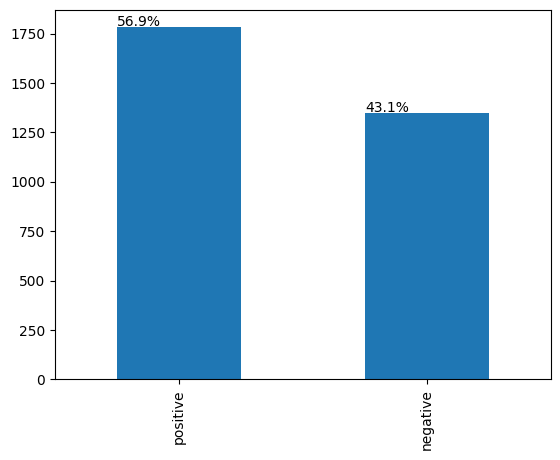

In [462]:
s = pd.value_counts(df['Sentiment_Label'])
ax = s.plot.bar()
n = len(df.index)
print (n)
for p in ax.patches:
    ax.annotate(str(round(p.get_height () / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

# Implementasi Algoritma Naive Bayes

In [463]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [464]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [466]:
df = pd.read_csv('/content/hasil_labelling_polusiudara.csv')
df.head()

,full_text,Sentiment_Score,Sentiment_Label
0,tidak henti hentinya bilang pake xixiu real me...,0.042838,negative
1,para antek corporation dari politikus sampai j...,0.193475,positive
2,langit jakarta kelabu aku kira polusi udara te...,0.055422,negative
3,israel iki nafas ae wes nyerimpeti dunyo ngent...,0.019383,negative
4,indonesia semoga dengan program ini polusi uda...,0.093110,negative


In [467]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Add your own preprocessing steps here if needed
    return text

df['processed_text'] = df['full_text'].apply(preprocess_text)

In [469]:
# Fill NaN values in 'processed_text' with an empty string
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Assuming your dataset has a column named 'processed_text'
X = vectorizer.fit_transform(df['processed_text']).toarray()
y = df['Sentiment_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [470]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

MultinomialNB()

In [471]:
y_pred = naive_bayes_classifier.predict(X_test)

In [472]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.7369255150554676
Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.55      0.65       285
    positive       0.71      0.89      0.79       346

    accuracy                           0.74       631
   macro avg       0.76      0.72      0.72       631
weighted avg       0.75      0.74      0.73       631

Confusion Matrix:
[[157 128]
 [ 38 308]]


In [473]:
df.shape

(3154, 4)

In [474]:
# Assuming your dataset has a column named 'Sentiment_Label' for sentiments
sentiment_counts = df['Sentiment_Label'].value_counts()

# Display the total number of sentiments
print(sentiment_counts)

positive    1781
negative    1373
Name: Sentiment_Label, dtype: int64


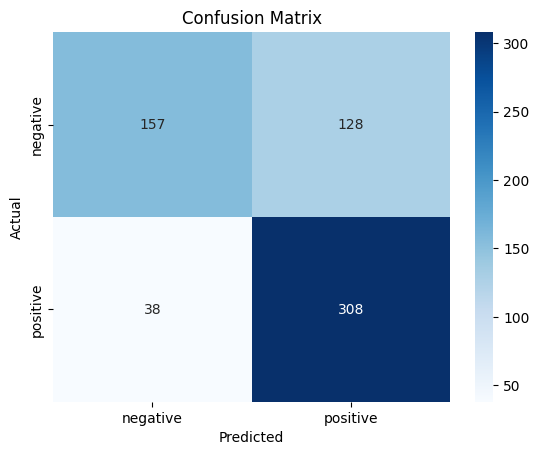

In [475]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=naive_bayes_classifier.classes_, yticklabels=naive_bayes_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

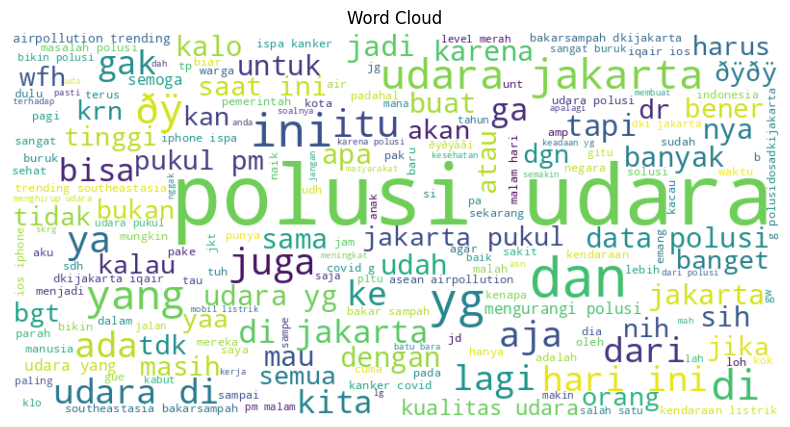

In [476]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['processed_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

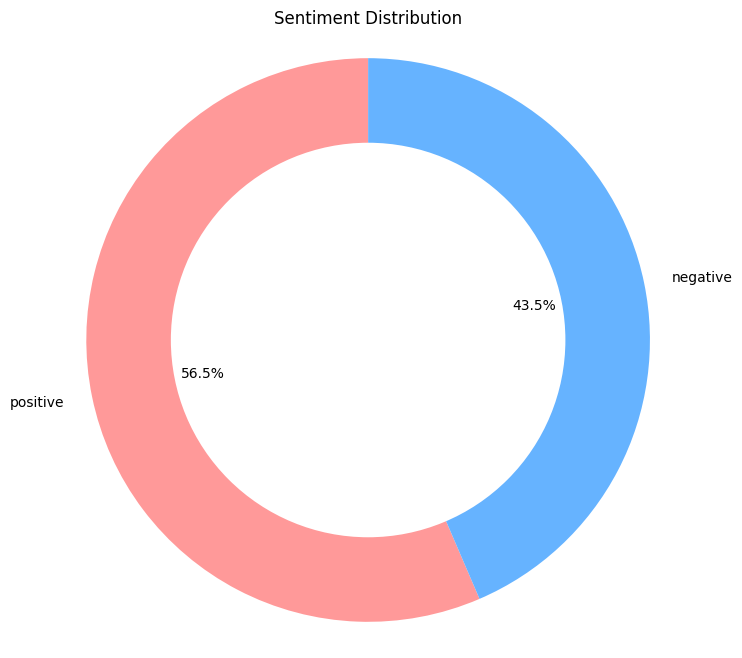

In [477]:
# Create a Donut Diagram (Pie Chart)
labels = df['Sentiment_Label'].value_counts().index
sizes = df['Sentiment_Label'].value_counts().values
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)

# Ensure 'explode' has the correct length
explode = [0] * len(labels)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()

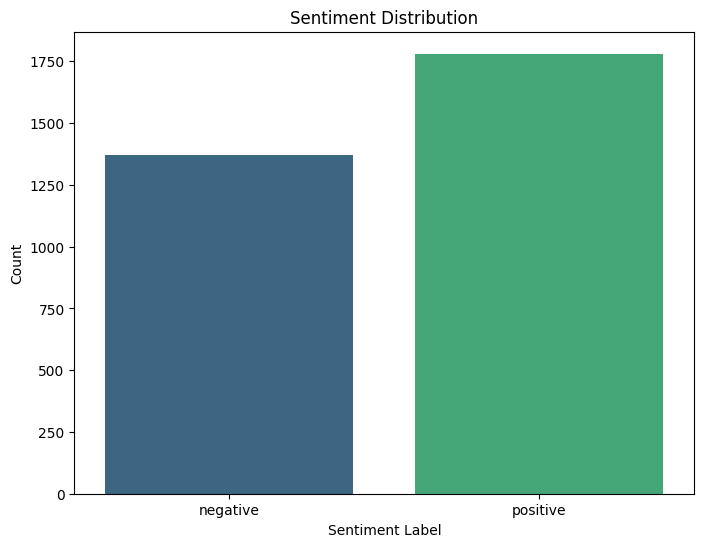

In [478]:
# Create a bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment_Label', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()